Head of dataset:
    YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

Tail of dataset:
     YearsExperience    Salary
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0

Info about dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None

Description of dataset:
        YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%

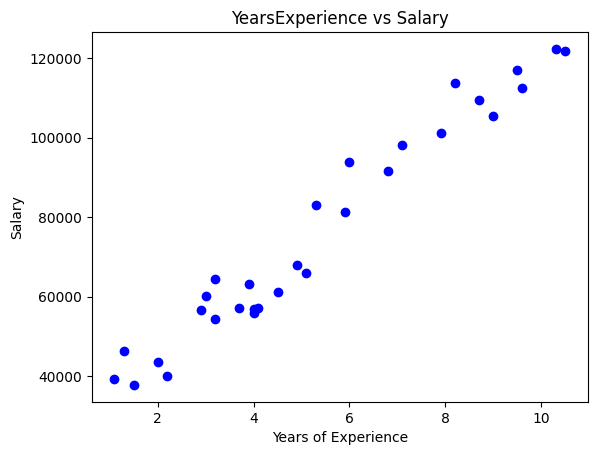

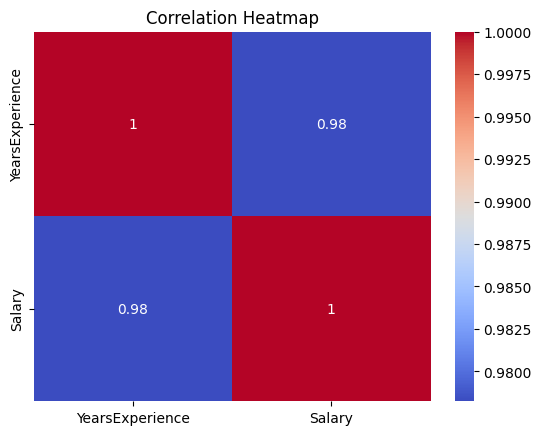


Mean Squared Error: 63721129.712950476
R2 Score: 0.8752513004196268


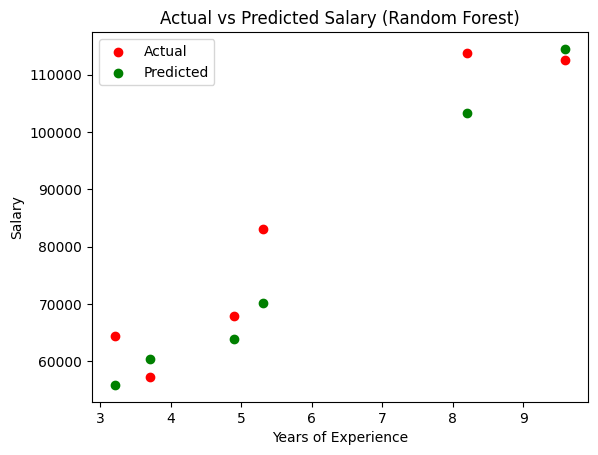

In [4]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load dataset
df = pd.read_csv("Salary_Data.csv")

# Step 3: EDA operations
print("Head of dataset:\n", df.head())
print("\nTail of dataset:\n", df.tail())
print("\nInfo about dataset:\n")
print(df.info())
print("\nDescription of dataset:\n", df.describe())

# Visualizations
plt.scatter(df["YearsExperience"], df["Salary"], color="blue")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("YearsExperience vs Salary")
plt.show()

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Step 4: Prepare data
X = df[["YearsExperience"]]   # feature
y = df["Salary"]              # target

# Split dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 6: Predictions
y_pred = rf.predict(X_test)

# Step 7: Evaluation
print("\nMean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Step 8: Plot actual vs predicted
plt.scatter(X_test, y_test, color="red", label="Actual")
plt.scatter(X_test, y_pred, color="green", label="Predicted")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.title("Actual vs Predicted Salary (Random Forest)")
plt.show()


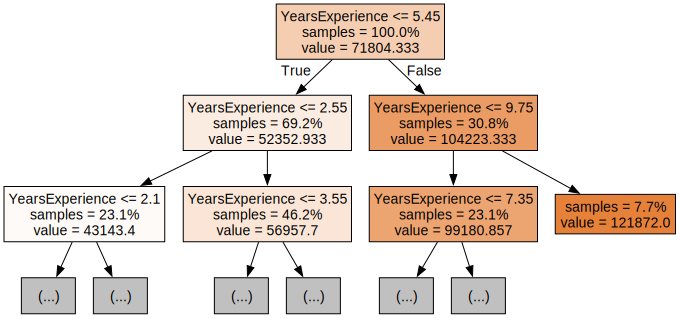

Tree 1 saved as rf_trees/tree_1.png


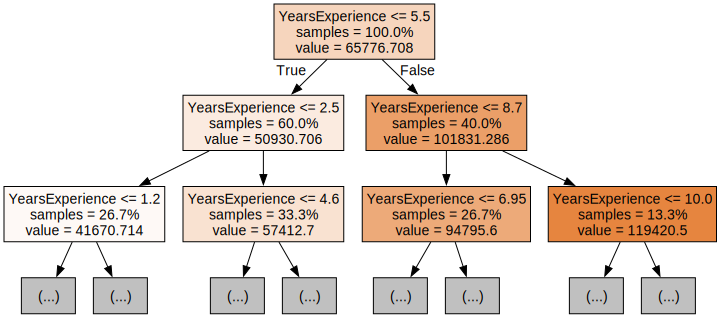

Tree 2 saved as rf_trees/tree_2.png


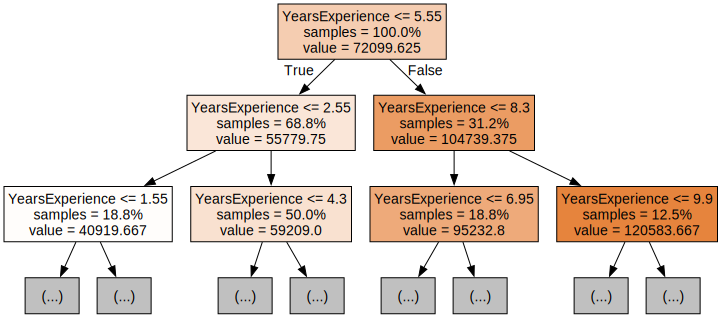

Tree 3 saved as rf_trees/tree_3.png


In [5]:
from sklearn.tree import export_graphviz
import graphviz
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv("Salary_Data.csv")

# Step 4: Prepare data
X = df[["YearsExperience"]]   # feature
y = df["Salary"]              # target

# Split dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a folder to save images (if not exists)
os.makedirs("rf_trees", exist_ok=True)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Export first 3 decision trees
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(
        tree,
        feature_names=X_train.columns,
        filled=True,
        max_depth=2,
        impurity=False,
        proportion=True
    )
    
    # Create graph
    graph = graphviz.Source(dot_data)
    
    # Display in notebook
    display(graph)
    
    # Save as image (PNG)
    graph.render(filename=f"rf_trees/tree_{i+1}", format="png", cleanup=True)
    print(f"Tree {i+1} saved as rf_trees/tree_{i+1}.png")
